In [7]:
import glob
import uproot
import numpy as np
#import h5py
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader

In [8]:
XYZ =np.load("../SBT/SBT_XYZ.npy")

In [9]:
neu_files = glob.glob("../SBT/ml_dataset/*neuDIS*.root")
mu_files = glob.glob("../SBT/ml_dataset/*muDIS*.root")
embg_files = glob.glob("../SBT/ml_dataset/*EMBG*.root")
embg_files = glob.glob("../SBT/mynewsignal/*datafile*.root")

In [10]:
len(embg_files)

129

In [11]:
file = uproot.open(embg_files[0])
x = file['tree;1']['inputmatrix'].array()
x = np.array(x)
#N += x.shape[0]

In [12]:
to_concat = []
ys_concat = []
N=0
for i in range(0,180):
    file = uproot.open(neu_files[i])
    x = file['tree;1']['inputmatrix'].array()
    x = np.array(x)
    N += x.shape[0]
    new = np.vstack([ np.expand_dims(x[:,:2000],0),np.expand_dims(np.repeat(XYZ[:1,:],x.shape[0],0),0),
              np.expand_dims(np.repeat(XYZ[1:2,:],x.shape[0],0),0),
              np.expand_dims(np.repeat(XYZ[2:,:],x.shape[0],0),0),
                    np.expand_dims(np.repeat(x[:,-5:-4],2000,1),0),
                    np.expand_dims(np.repeat(x[:,-4:-3],2000,1),0),
                    np.expand_dims(np.repeat(x[:,-3:-2],2000,1),0),
                    np.expand_dims(np.repeat(x[:,-2:-1],2000,1),0)])
    new = np.swapaxes(new,0,1)
    new = np.swapaxes(new,1,2)
    to_concat.append(new)
ys_concat.append(np.ones((N)))
print(N)
N=0
for i in range(0,120):
    file = uproot.open(mu_files[i])
    x = file['tree;1']['inputmatrix'].array()
    x = np.array(x)
    N += x.shape[0]
    new = np.vstack([ np.expand_dims(x[:,:2000],0),np.expand_dims(np.repeat(XYZ[:1,:],x.shape[0],0),0),
              np.expand_dims(np.repeat(XYZ[1:2,:],x.shape[0],0),0),
              np.expand_dims(np.repeat(XYZ[2:,:],x.shape[0],0),0),
                    np.expand_dims(np.repeat(x[:,-5:-4],2000,1),0),
                    np.expand_dims(np.repeat(x[:,-4:-3],2000,1),0),
                    np.expand_dims(np.repeat(x[:,-3:-2],2000,1),0),
                    np.expand_dims(np.repeat(x[:,-2:-1],2000,1),0)])
    new = np.swapaxes(new,0,1)
    new = np.swapaxes(new,1,2)
    to_concat.append(new)
ys_concat.append(2*np.ones((N)))
print(N)
N=0
for i in range(0,9):
    file = uproot.open(embg_files[i])
    x = file['tree;1']['inputmatrix'].array()
    x = np.array(x)
    N += x.shape[0]
    new = np.vstack([ np.expand_dims(x[:,:2000],0),np.expand_dims(np.repeat(XYZ[:1,:],x.shape[0],0),0),
              np.expand_dims(np.repeat(XYZ[1:2,:],x.shape[0],0),0),
              np.expand_dims(np.repeat(XYZ[2:,:],x.shape[0],0),0),
                    np.expand_dims(np.repeat(x[:,-5:-4],2000,1),0),
                    np.expand_dims(np.repeat(x[:,-4:-3],2000,1),0),
                    np.expand_dims(np.repeat(x[:,-3:-2],2000,1),0),
                    np.expand_dims(np.repeat(x[:,-2:-1],2000,1),0)])
    new = np.swapaxes(new,0,1)
    new = np.swapaxes(new,1,2)
    to_concat.append(new)
print(N)
ys_concat.append(np.zeros((N)))

16115
16462
18000


In [13]:
X=np.concatenate(to_concat)

In [14]:
X[:,0,-1]

array([0., 0., 0., ..., 0., 0., 0.])

In [15]:
XSBT = X[:,:,:4].copy()

In [16]:
XSBT.shape

(50577, 2000, 4)

In [17]:
XUBT = X[:,0,-4:].copy()

In [18]:
XUBT

array([[-1.15297530e+00, -1.06650871e+01, -2.46806012e+03,
         0.00000000e+00],
       [ 2.27382430e+00, -2.73225196e+01,  2.59009559e+03,
         0.00000000e+00],
       [ 3.07086560e+01, -7.17960141e+01,  2.57988787e+03,
         0.00000000e+00],
       ...,
       [ 2.71419492e+01, -1.80422816e+02,  9.12488102e+02,
         0.00000000e+00],
       [-4.93972799e+01, -1.30067520e+02,  2.12675391e+03,
         0.00000000e+00],
       [ 3.53289543e+01, -2.39019450e+00, -2.17331841e+03,
         0.00000000e+00]])

In [19]:
Xsig = X[:,0,3:].copy()

In [20]:
Xsig.shape

(50577, 5)

In [21]:
Xsig.shape

(50577, 5)

In [22]:
Xsig[:,0]=0
Xsig[:,-1]=1

In [23]:
Xsig.shape

(50577, 5)

In [24]:
XSBT.shape

(50577, 2000, 4)

In [25]:
Xsig.shape

(50577, 5)

In [26]:
XSBT[:,:,3]

array([[-2437.25, -2437.25, -2437.25, ...,  2442.75,  2442.75,  2442.75],
       [-2437.25, -2437.25, -2437.25, ...,  2442.75,  2442.75,  2442.75],
       [-2437.25, -2437.25, -2437.25, ...,  2442.75,  2442.75,  2442.75],
       ...,
       [-2437.25, -2437.25, -2437.25, ...,  2442.75,  2442.75,  2442.75],
       [-2437.25, -2437.25, -2437.25, ...,  2442.75,  2442.75,  2442.75],
       [-2437.25, -2437.25, -2437.25, ...,  2442.75,  2442.75,  2442.75]])

In [27]:
XSBT.shape

(50577, 2000, 4)

In [26]:
ys=np.concatenate(ys_concat)

In [27]:
def adjacency(n_dau):
    """ generates a fully connected adjacency
        for a mother to daughters """
    #A = np.diag(np.ones(n_dau+1))
    A = np.zeros((n_dau+1, n_dau+1))
    
    A[0,:] =1
    A[:,0] =1
    A[0,0]= 0
    return A
    

In [28]:
def adjacency2(n_dau):
    """ generates a fully connected adjacency
        for a mother to daughters """
    #A = np.diag(np.ones(n_dau+1))
    A=np.ones((n_dau+1, n_dau+1)) #- np.diag( [1]*(n_dau+1) )
    return A

In [30]:
from sklearn.model_selection import train_test_split
import torch
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [31]:
X_SBT_train, X_SBT_val , X_sig_train, X_sig_val, X_UBT_train, X_UBT_val,  y_train, y_val   = train_test_split(XSBT, Xsig, XUBT, ys , test_size= 0.2,shuffle=True)

In [32]:
del XSBT
del  Xsig, XUBT
del X

In [33]:
del ys

In [34]:
X_SBT_train.shape

(40461, 2000, 4)

In [35]:
X_SBT_train[i].shape

(2000, 4)

In [36]:
import torch
from torch_geometric.nn import knn
k=5
kmeans = True

In [37]:
X_UBT_train[0].shape

(4,)

In [38]:
train_data=[]
Xs = []
globals = []
edges = []
j = 0

for i in range(X_SBT_train.shape[0]):
#for i in range(2):    
    #Xcon = np.concatenate([np.swapaxes(np.expand_dims(X_sig_train[i],1),0,1) , X_SBT_train[i][  X_SBT_train[i][:,0]>0 ]], 0)
    # add phi
    Xcon = X_SBT_train[i][ X_SBT_train[i][:,0]>0 ]
    #Xsig = X_UBT_train[i]
    Xcon = np.hstack([Xcon , np.expand_dims(np.arctan(Xcon[:,2] / Xcon[:,1]),1)])
    if Xcon.shape[0] < 1:
        continue
    #Xs.append(Xcon)
    y = torch.tensor(y_train[i], dtype=torch.int64)

    Xcon2 = torch.tensor(Xcon, dtype=torch.float)
    if Xcon.shape[0] < 22:
        A = adjacency2(Xcon.shape[0]-1)
        edge_index =torch.tensor(A, dtype=torch.float).nonzero().t().contiguous() 
    else:
        k = 20
        assign_index = knn(Xcon2[1:], Xcon2[1:], k)
        assign_index = assign_index+1
        assign_index = assign_index[:,assign_index[0]!=assign_index[1]]
        edge_index = assign_index

    #print(edge_index.shape)
    if edge_index.shape[1] == 0:
        print(edge_index.shape)
    #print(edge_index.shape)

    #print((Xcon[edge_index[0],1:4] - Xcon[edge_index[1],1:4])**2)
    if Xcon.shape[0] == 1:
        r = torch.tensor(np.sqrt(np.sum((Xcon[edge_index[0],1:4] - Xcon[edge_index[1],1:4])**2,0)), dtype=torch.float)
    else:
        r = torch.tensor(np.sqrt(np.sum((Xcon[edge_index[0],1:4] - Xcon[edge_index[1],1:4])**2,1)), dtype=torch.float)
    delta_z =torch.tensor(torch.tensor( Xcon[edge_index[0],3] - Xcon[edge_index[1],3]), dtype=torch.float)
    delta_phi =torch.tensor( np.arctan(Xcon[edge_index[0],2] / Xcon[edge_index[0],1]) - np.arctan(Xcon[edge_index[1],2] / Xcon[edge_index[1],1]), dtype=torch.float)
    edge_features = torch.vstack([r, delta_z, delta_phi])
    edge_features = edge_features.T
    #bool = ~( ((edge_index[0] != 0) & (edge_index[1] != 0)) & (torch.abs(edge_features[:,1]) > 20))
    #edge_features = edge_features[bool]
    #edges.append(edge_features)

    #edge_index = torch.vstack( [edge_index[0][bool] , edge_index[1][bool]])
    #print(edge_index.shape)
    global_features = np.hstack([X_UBT_train[i] , np.array([Xcon.shape[0]]) ])

    global_features = torch.tensor(global_features, dtype=torch.float).unsqueeze(0)
    #globals.append(np.array(global_features))
    edgepos =  torch.tensor([j]*edge_index[0].shape[0],dtype=torch.int64)

    j += 1
    # edge_features = edge_scaler.transform(np.array(edge_features))
    # edge_features = torch.tensor(edge_features, dtype=torch.float)
    # global_features = global_scaler.transform(np.array(global_features))
    # global_features = torch.tensor(global_features, dtype=torch.float)
    # Xcon = node_scaler.transform(Xcon)
    Xcon = torch.tensor(Xcon, dtype=torch.float)
    train_data.append(Data(nodes=Xcon, edge_index=edge_index,y = y, edges = edge_features, graph_globals = global_features, edgepos=edgepos))

/tmp/ipykernel_7036/4046645671.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  delta_z =torch.tensor(torch.tensor( Xcon[edge_index[0],3] - Xcon[edge_index[1],3]), dtype=torch.float)
/tmp/ipykernel_7036/4046645671.py:13: RuntimeWarning: divide by zero encountered in divide
  Xcon = np.hstack([Xcon , np.expand_dims(np.arctan(Xcon[:,2] / Xcon[:,1]),1)])
/tmp/ipykernel_7036/4046645671.py:41: RuntimeWarning: divide by zero encountered in divide
  delta_phi =torch.tensor( np.arctan(Xcon[edge_index[0],2] / Xcon[edge_index[0],1]) - np.arctan(Xcon[edge_index[1],2] / Xcon[edge_index[1],1]), dtype=torch.float)
/tmp/ipykernel_7036/4046645671.py:41: RuntimeWarning: divide by zero encountered in scalar divide
  delta_phi =torch.tensor( np.arctan(Xcon[edge_index[0],2] / Xcon[edge_index[0],1]) - np.arctan(Xcon[edge_index[1],2] / Xcon[edge_index[1]

In [39]:
val_data=[]
#Xs = []
#edges = [] 
j = 0

for i in range(X_SBT_val.shape[0]):
    
    Xcon = X_SBT_train[i][ X_SBT_train[i][:,0]>0 ]
    Xcon = np.hstack([Xcon , np.expand_dims(np.arctan(Xcon[:,2] / Xcon[:,1]),1)])
    #Xsig = X_UBT_train[i]
    #Xcon = np.hstack([Xcon , np.expand_dims(np.arctan(Xcon[:,2] / Xcon[:,1]),1),
    #                 np.sqrt(np.sum((Xcon[edge_index[0],1:4] - Xcon[edge_index[1],1:4])**2,0))])
    if Xcon.shape[0] <1:
        continue


    #Xs.append(Xcon)
    y = torch.tensor(y_train[i], dtype=torch.int64)

    Xcon2 = torch.tensor(Xcon, dtype=torch.float)
    if Xcon.shape[0] < 22:
        A = adjacency2(Xcon.shape[0]-1)
        edge_index =torch.tensor(A, dtype=torch.float).nonzero().t().contiguous() 
    else:
        k = 20
        assign_index = knn(Xcon2[1:], Xcon2[1:], k)
        assign_index = assign_index+1
        assign_index = assign_index[:,assign_index[0]!=assign_index[1]]
        edge_index = assign_index

    #print(edge_index.shape)
    #if edge_index.shape[1] == 0:
    #    print(edge_index.shape)
    
    
    #print(edge_index)
    #print(Xcon)
    
    if Xcon.shape[0] == 1:
        r = torch.tensor(np.sqrt(np.sum((Xcon[edge_index[0],1:4] - Xcon[edge_index[1],1:4])**2,0)), dtype=torch.float)
    else:
        r = torch.tensor(np.sqrt(np.sum((Xcon[edge_index[0],1:4] - Xcon[edge_index[1],1:4])**2,1)), dtype=torch.float)
    delta_z =torch.tensor(torch.tensor( Xcon[edge_index[0],3] - Xcon[edge_index[1],3]), dtype=torch.float)
    delta_phi =torch.tensor( np.arctan(Xcon[edge_index[0],2] / Xcon[edge_index[0],1]) - np.arctan(Xcon[edge_index[1],2] / Xcon[edge_index[1],1]), dtype=torch.float)
    edge_features = torch.vstack([r, delta_z, delta_phi])
    edge_features = edge_features.T
    #edges.append(edge_features)
    #bool = ~( ((edge_index[0] != 0) & (edge_index[1] != 0)) & (torch.abs(edge_features[:,1]) > 20))
    #edge_features = edge_features[bool]
    
   #edge_index = torch.vstack( [edge_index[0][bool] , edge_index[1][bool]])    
    global_features = np.hstack([X_UBT_train[i] , np.array([Xcon.shape[0]]) ])
    global_features = torch.tensor(global_features, dtype=torch.float).unsqueeze(0)
    edgepos =  torch.tensor([j]*edge_index[0].shape[0],dtype=torch.int64)
    #print(edgepos)
    #print(edge_features.shape)
    #print(edge_index.shape)
    #print(Xcon.shape)
    #print(global_features.shape)
    # edge_features = edge_scaler.transform(np.array(edge_features))
    # edge_features = torch.tensor(edge_features, dtype=torch.float)
    # global_features = global_scaler.transform(np.array(global_features))
    # global_features = torch.tensor(global_features, dtype=torch.float)
    # Xcon = node_scaler.transform(Xcon)
    j += 1
    Xcon = torch.tensor(Xcon, dtype=torch.float)
    val_data.append(Data(nodes=Xcon, edge_index=edge_index,y = y, edges = edge_features, graph_globals = global_features, edgepos=edgepos))

not there 
not there 
not there 
here
1.0
not there 
not there 
not there 
not there 
not there 
not there 
not there 
here
0.0
not there 
here
1.0
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
here
1.0
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
here
0.0
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
here
0.0
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
here
0.0
not there 
not there 
not there 
not there 
not there 
not there 
here
1.0
here
0.0
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
here
0.0
here
0.0
not there 
here
0.0
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
here
0.0
not there 
not there 
not

/tmp/ipykernel_7036/2671991764.py:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  delta_z =torch.tensor(torch.tensor( Xcon[edge_index[0],3] - Xcon[edge_index[1],3]), dtype=torch.float)
/tmp/ipykernel_7036/2671991764.py:9: RuntimeWarning: divide by zero encountered in divide
  Xcon = np.hstack([Xcon , np.expand_dims(np.arctan(Xcon[:,2] / Xcon[:,1]),1)])
/tmp/ipykernel_7036/2671991764.py:46: RuntimeWarning: divide by zero encountered in divide
  delta_phi =torch.tensor( np.arctan(Xcon[edge_index[0],2] / Xcon[edge_index[0],1]) - np.arctan(Xcon[edge_index[1],2] / Xcon[edge_index[1],1]), dtype=torch.float)


not there 
not there 
not there 
here
0.0
not there 
not there 
here
0.0
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
here
1.0
not there 
here
1.0
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
here
1.0
not there 
not there 
not there 
not there 
not there 
not there 
not there 
here
0.0
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
here
2.0
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
here
0.0
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not 

/tmp/ipykernel_7036/2671991764.py:46: RuntimeWarning: divide by zero encountered in scalar divide
  delta_phi =torch.tensor( np.arctan(Xcon[edge_index[0],2] / Xcon[edge_index[0],1]) - np.arctan(Xcon[edge_index[1],2] / Xcon[edge_index[1],1]), dtype=torch.float)


not there 
not there 
not there 
not there 
not there 
not there 
not there 
here
0.0
not there 
here
0.0
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
here
0.0
not there 
here
0.0
not there 
not there 
not there 
here
0.0
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
here
1.0
here
0.0
not there 
not there 
here
0.0
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
here
0.0
not there 
here
1.0
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not there 
not ther

In [40]:
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader

loader = DataLoader(train_data, batch_size=32 )#, shuffle=True)
valloader = DataLoader(val_data, batch_size=32 ) #shuffle=True)

In [41]:
STEP_SIZE = 2
MLP_OUTPUT_SIZE = 8
HIDDEN_CHANNELS = 64
NUM_LAYERS = 4
from sbtveto.model.gnn_model import EncodeProcessDecode
model=EncodeProcessDecode(mlp_output_size=MLP_OUTPUT_SIZE, global_op=3,num_blocks=4)

#myModel.cuda()
#device='cuda'
#optimizer = torch.optim.Adam(myModel.parameters(), lr=0.00005)
#optimizer = torch.optim.Adam(myModel.parameters(), lr=0.001)
#criterion = nn.CrossEntropyLoss(weight=weights)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model.to(device)

EncodeProcessDecode(
  (_encoder): MLPGraphIndependent(
    (_network): GraphIndependent(
      (_edge_model): WrappedModelFnModule(
        (_model): MLP(-1, 128, 128, 128, 8)
      )
      (_node_model): WrappedModelFnModule(
        (_model): MLP(-1, 128, 128, 128, 8)
      )
      (_global_model): WrappedModelFnModule(
        (_model): MLP(-1, 128, 128, 128, 8)
      )
    )
  )
  (_core): MLPGraphNetwork(
    (_network): GraphNetwork(
      (_edge_block): EdgeBlock(
        (_edge_model): MLP(-1, 128, 128, 128, 8)
      )
      (_node_block): NodeBlock(
        (_node_model): MLP(-1, 128, 128, 128, 8)
        (_sent_edges_aggregator): EdgesToNodesAggregator()
      )
      (_global_block): GlobalBlock(
        (_global_model): MLP(-1, 128, 128, 128, 8)
        (_edges_aggregator): EdgesToGlobalsAggregator()
        (_nodes_aggregator): NodesToGlobalsAggregator()
      )
    )
  )
  (_blocks): ModuleList(
    (0-3): 4 x MLPGraphNetwork(
      (_network): GraphNetwork(
        (_ed

In [42]:
losses = []
accuracy = []
vallosses = []
valaccuracy = []

In [43]:

optimizer_GCN = torch.optim.Adam(model.parameters(), lr=0.001)

criterion = torch.nn.CrossEntropyLoss()

#criterion = torch.nn.HuberLoss() 
for epoch in range(25):
    total = 0
    correct = 0
    valtotal = 0
    valcorrect = 0
    epoch_loss = 0 
    val_epoch_loss = 0
    if epoch == 20:
        optimizer_GCN = torch.optim.Adam(model.parameters(), lr=0.0001)
    
    for b in loader:
        b.to(device)

        #b['graph_globals'] = b['graph_globals'].unsqueeze(1)
        #b['edges'] = b['edges'].unsqueeze(1)
 #       print(b.nodes.shape)
        #print(b.edges.shape)
        #print(b.edgepos.shape)
        b['receivers'] = b.edge_index[1]
        b['senders'] = b.edge_index[0]
        #print(b.edgepos)
        b['edgepos'] = b['edgepos'] - torch.min(b['edgepos'])

        optimizer_GCN.zero_grad()
        #print("in shape ", b.x.shape)
        #print(b.edgepos)
        #print(b.edgepos.shape)
        #print(b.edges.shape)
        #print(b.graph_globals[b.edgepos])

        out = model(b)
        out = out['graph_globals']
        #print(out.shape)
        #print(b.y.shape)
        #print(model(b)['graph_globals'])
        #print(out)
        #.graph_globals
        #print(out.shape)
        #print(b.y.shape, out.shape)
        #out = out.squeeze(1)
        #print(b.y.shape, out.shape)
        loss = criterion(out, b.y) 



        loss.backward()
        optimizer_GCN.step()
        total += b.y.size(0)
        epoch_loss += loss.item()/32

        
        
    for b in valloader:
        #print("in cval ")
        b.to(device)
        #b['graph_globals'] = b['graph_globals'].unsqueeze(1)
        #b['edges'] = b['edges'].unsqueeze(1)
        b['receivers'] = b.edge_index[1]
        b['senders'] = b.edge_index[0]
        b['edgepos'] = b['edgepos'] - torch.min(b['edgepos'])
        
        out = model(b)['graph_globals']
        
        #out = out.squeeze(1)
        valloss = criterion(out, b.y)
       
        valtotal += b.y.size(0)
        val_epoch_loss += valloss.item()/32

        
            
        
    print("Epoch ", epoch)    
    print("Training Loss ", epoch_loss)
    #print("Training Accuracy % ", 100*correct/total)
    print("Val Loss ", val_epoch_loss)
    #print("Val Accuracy % ", 100*valcorrect/valtotal)
    losses.append(epoch_loss)
    #accuracy.append(100*correct/total)
    vallosses.append(val_epoch_loss)
    #valaccuracy.append(100*valcorrect/valtotal)
    print("")

shape of nodes to collect  torch.Size([2214, 8])
shape of nodes to collect  torch.Size([2214, 8])
shape of nodes to collect  torch.Size([2214, 8])
shape of nodes to collect  torch.Size([2214, 8])
shape of nodes to collect  torch.Size([2214, 16])
shape of nodes to collect  torch.Size([2214, 16])
shape of nodes to collect  torch.Size([2214, 8])
shape of nodes to collect  torch.Size([2214, 16])
shape of nodes to collect  torch.Size([2214, 16])
shape of nodes to collect  torch.Size([2214, 8])
shape of nodes to collect  torch.Size([2214, 16])
shape of nodes to collect  torch.Size([2214, 16])
shape of nodes to collect  torch.Size([2609, 8])
shape of nodes to collect  torch.Size([2609, 8])
shape of nodes to collect  torch.Size([2609, 8])
shape of nodes to collect  torch.Size([2609, 8])
shape of nodes to collect  torch.Size([2609, 16])
shape of nodes to collect  torch.Size([2609, 16])
shape of nodes to collect  torch.Size([2609, 8])
shape of nodes to collect  torch.Size([2609, 16])
shape of no

KeyboardInterrupt: 

In [ ]:
!ls

In [29]:
torch.save(model.state_dict(), "SBT_vacuum_multiclass_4block_GNN_new.pt")

NameError: name 'model' is not defined

In [40]:
!ls data

robust_scaler.pkl		     SBT_vacuum_multiclass_6block_GNN.pt
SBT_vacuum_multiclass_4block_GNN.pt  SBTveto_vacuum_multiclass_NN.pth


In [44]:
model.load_state_dict(torch.load("data/SBT_vacuum_multiclass_4block_GNN.pt", weights_only=True))
model.eval()

EncodeProcessDecode(
  (_encoder): MLPGraphIndependent(
    (_network): GraphIndependent(
      (_edge_model): WrappedModelFnModule(
        (_model): MLP(-1, 128, 128, 128, 8)
      )
      (_node_model): WrappedModelFnModule(
        (_model): MLP(-1, 128, 128, 128, 8)
      )
      (_global_model): WrappedModelFnModule(
        (_model): MLP(-1, 128, 128, 128, 8)
      )
    )
  )
  (_core): MLPGraphNetwork(
    (_network): GraphNetwork(
      (_edge_block): EdgeBlock(
        (_edge_model): MLP(-1, 128, 128, 128, 8)
      )
      (_node_block): NodeBlock(
        (_node_model): MLP(-1, 128, 128, 128, 8)
        (_sent_edges_aggregator): EdgesToNodesAggregator()
      )
      (_global_block): GlobalBlock(
        (_global_model): MLP(-1, 128, 128, 128, 8)
        (_edges_aggregator): EdgesToGlobalsAggregator()
        (_nodes_aggregator): NodesToGlobalsAggregator()
      )
    )
  )
  (_blocks): ModuleList(
    (0-3): 4 x MLPGraphNetwork(
      (_network): GraphNetwork(
        (_ed

In [47]:
b.edgepos

tensor([ 0,  0,  0,  ..., 31, 31, 31], device='cuda:0')

In [46]:
b.batch

tensor([ 0,  0,  0,  ..., 29, 29, 29], device='cuda:0')

In [64]:
torch.min(b.receivers)

tensor(1, device='cuda:0')

In [48]:
ypreds  = []
true = []
for b in valloader:
    b.to(device)
    #b['graph_globals'] = b['graph_globals'].unsqueeze(1)
    #b['edges'] = b['edges'].unsqueeze(1)
    b['receivers'] = b.edge_index[1]
    b['senders'] = b.edge_index[0]
    b['edgepos'] = b['edgepos'] - torch.min(b['edgepos'])
    out = model(b)["graph_globals"]
    out = out.squeeze(1)

    _, predicted = torch.max(out, dim = 1)
    true.append(b.y.detach().cpu().numpy())
    ypreds.append(predicted.cpu().detach().numpy())        
preds = np.concatenate(ypreds)
true = np.concatenate(true)

In [49]:
preds.shape

(9074,)

In [50]:
np.sum(preds == true)/true.shape[0]

np.float64(0.9727793696275072)

In [76]:
preds

array([1, 0, 0, ..., 2, 2, 1])

In [77]:
true[true==0]

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
labels=['signal',r'$\nu$-DIS', r'$\mu$-DIS']
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true, preds)

In [52]:
cmnew =cm/np.expand_dims(np.sum(cm,1),1)

In [57]:
np.expand_dims(np.sum(cm,1),1)

array([[2729],
       [3046],
       [3254]])

In [58]:
cm

array([[2719,    9,    1],
       [  11, 2927,  108],
       [   0,  136, 3118]])

In [82]:
100*9/(9+3+3050)

0.29392553886348793

In [83]:
1181/(1181+3)

0.9974662162162162

In [84]:
cmnew

array([[9.97068523e-01, 2.19860755e-03, 7.32869183e-04],
       [5.49805951e-03, 9.65394567e-01, 2.91073739e-02],
       [3.06278714e-04, 3.43032159e-02, 9.65390505e-01]])

In [59]:
import matplotlib.pyplot as plt

def plot_errorband(x, y, y_err, label, color):
    plt.plot(x, y, color=color, ls='solid', label=label)
    plt.fill_between(x, y_err[0],y_err[1], color=color, alpha=0.3, lw=0)
   
    
def init_thesis_plot_style():
    my_rc_params = {
        "xtick.direction": "in",
        "xtick.major.size": 8.0,
        "xtick.minor.size": 4.0,
        "xtick.minor.visible": True,
        "xtick.major.width": 1.2,
        "xtick.minor.width": 0.9,
        "ytick.direction": "in",
        "ytick.major.size": 8.0,
        "ytick.minor.size": 4.0,
        "ytick.minor.visible": True,
        "ytick.major.width": 1.2,
        "ytick.minor.width": 0.9,
        "errorbar.capsize": 2,
        "axes.linewidth": 1.2,
        # "font.familiy": "serif",
        "font.size": 14,
        "axes.grid": False,
        "ytick.right": True,
        "xtick.top": True
    }
    return(my_rc_params)
class Tango(object):
    scarlet_red_light = '#ef2929'
    scarlet_red = '#cc0000'
    scarlet_red_dark = '#a40000'

    aluminium_light = '#eeeeec'
    aluminium = '#d3d7cf'
    aluminium_dark = '#babdb6'

    butter_light = '#fce94f'
    butter = '#edd400'
    butter_dark = '#c4a000'

    chameleon_light = '#8ae234'
    chameleon = '#73d216'
    chameleon_dark = '#4e9a06'

    orange_light = '#fcaf3e'
    orange = '#f57900'
    orange_dark = '#ce5c00'

    chocolate_light = '#e9b96e'
    chocolate = '#c17d11'
    chocolate_dark = '#8f5902'

    sky_blue_light = '#729fcf'
    sky_blue = '#3465a4'
    sky_blue_dark = '#204a87'

    plum_light = '#ad7fa8'
    plum = '#75507b'
    plum_dark = '#5c3566'

    slate_light = '#888a85'
    slate = '#555753'
    slate_dark = '#2e3436'

init_thesis_plot_style()
plt.rcParams.update(init_thesis_plot_style())

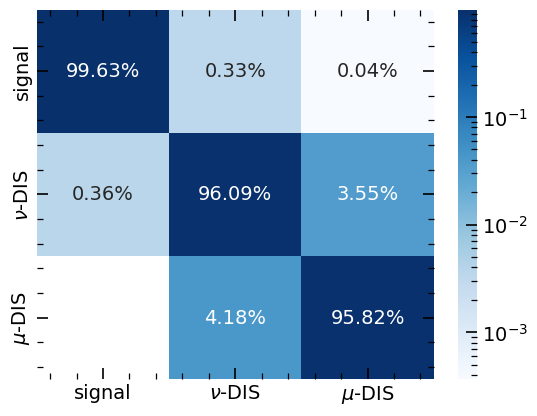

In [60]:
import seaborn as sns
from matplotlib.colors import LogNorm
sns.heatmap(cmnew, 
            fmt='.2%', norm= LogNorm(),
            annot=True,  xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.savefig('CM_GNN_CE_val_newdataset_new_6block.png')

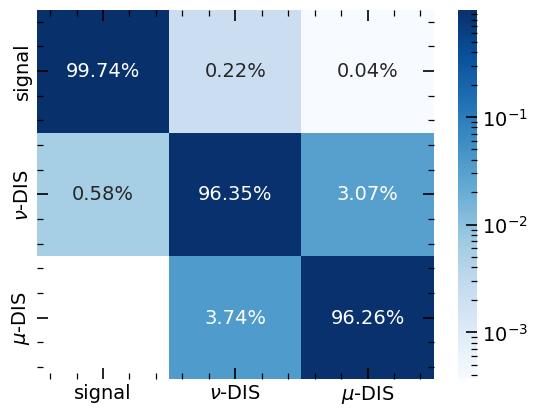

In [59]:
import seaborn as sns
from matplotlib.colors import LogNorm
sns.heatmap(cmnew, 
            fmt='.2%', norm= LogNorm(),
            annot=True,  xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.savefig('CM_GNN_CE_val_newdataset_new.png')

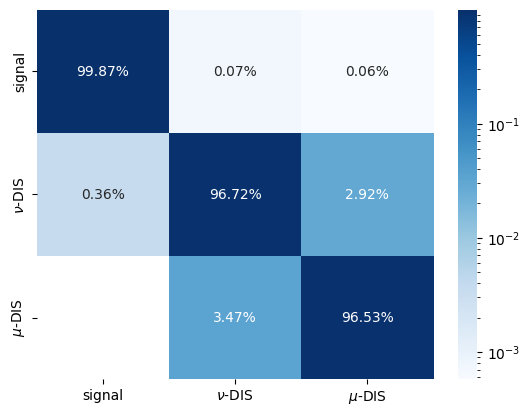

In [87]:
import seaborn as sns
from matplotlib.colors import LogNorm
sns.heatmap(cmnew, 
            fmt='.2%', norm= LogNorm(),
            annot=True,  xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.savefig('CM_GNN_CE_train.png')

In [69]:
cm

array([[3050,    3,    3],
       [   9, 3299,   95],
       [   0,  120, 3458]])

0.9979630264793249

In [71]:
9/(3050+3+3+3)

0.002942137953579601

In [80]:
len(ypred[true==2])

1212

In [77]:
ypred = preds

In [1]:
np.sum(ypred[true==0]==0)/len(ypred[true==0])

NameError: name 'np' is not defined

In [71]:
np.sum(ypred[true==0]==1)/len(ypred[true==0])

0.0008250825082508251

In [82]:
np.sum(ypred[true==2]==1)

1

In [73]:
np.sum(ypred[true==2]==0)/len(ypred[true==2])

0.007425742574257425

In [83]:
np.sum(ypred[true==2]==0)

9

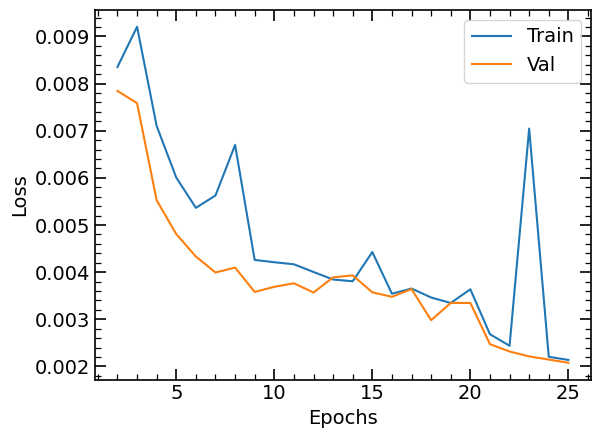

In [87]:
import matplotlib.pyplot as plt
epochs = np.arange(1, len(losses)+1)

plt.plot(epochs[1:],np.array(losses)[1:]*32./len(train_data), label="Train")
plt.plot(epochs[1:],np.array(vallosses)[1:]*32./len(val_data), label="Val")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [65]:
file = uproot.open(neu_files[0])
x = file['tree;1']['inputmatrix'].array()
x = np.array(x)[:,:-1]

In [66]:
x[:,-1]

array([  0.,   0.,   0.,  45., 103., 204.,  28.,   4.,  55., 234.,   0.,
       146.,   8., 149.,  82.,  90.,  15.,  36.,  73., 120.,  27., 205.,
        86.,  54.,  16.,   0.,   0.,   0., 135., 106., 188.,   0.,   0.,
        19.,  33.,  77.,   6., 106., 144.,  97.,  73.,  87.,   0.,  39.,
         0.,  62.,   4.,   0.,   0.,  55.,  32., 211.,  65.,  65., 127.,
       271.,   0.,   1.,   0., 186.,   0.,  14.,  86.,   0.,   0.,  16.,
        28.,  13.,  13.,   0.,  20.,  70., 115.,  92.,  65.,  99.,  12.,
        13.,  49.,   0.,   0.,  57., 109.,  11.,  15.,   0.,   0.,  28.,
        14., 208.,   0.,  31.,   0., 119.,   2.,   0.,  26.,   0., 170.,
         3.,  29., 131.,   0.,  57.])

In [57]:
x = np.vstack([ np.expand_dims(x[:,:2000],0),np.expand_dims(np.repeat(XYZ[:1,:],x.shape[0],0),0),
              np.expand_dims(np.repeat(XYZ[1:2,:],x.shape[0],0),0),
              np.expand_dims(np.repeat(XYZ[2:,:],x.shape[0],0),0),
                    np.expand_dims(np.repeat(x[:,-4:-3],2000,1),0),
                    np.expand_dims(np.repeat(x[:,-3:-2],2000,1),0),
                    np.expand_dims(np.repeat(x[:,-2:-1],2000,1),0),
                    np.expand_dims(np.repeat(x[:,-1:],2000,1),0)])

In [58]:
new.shape

(2000, 2000, 8)

In [59]:
x.shape

(8, 104, 2000)

In [81]:
knn(torch.tensor([1,2,10,11]),torch.tensor([1,2,10,11]),2)

tensor([[0, 0, 1, 1, 2, 2, 3, 3],
        [0, 1, 1, 0, 2, 3, 3, 2]])

In [63]:
def gnn_output(model, x, XYZ,  device = "cpu"):
    j=0
    X = np.vstack([ np.expand_dims(x[:,:2000],0),np.expand_dims(np.repeat(XYZ[:1,:],x.shape[0],0),0),
              np.expand_dims(np.repeat(XYZ[1:2,:],x.shape[0],0),0),
              np.expand_dims(np.repeat(XYZ[2:,:],x.shape[0],0),0),
                    np.expand_dims(np.repeat(x[:,-4:-3],2000,1),0),
                    np.expand_dims(np.repeat(x[:,-3:-2],2000,1),0),
                    np.expand_dims(np.repeat(x[:,-2:-1],2000,1),0),
                    np.expand_dims(np.repeat(x[:,-1:],2000,1),0)])
    X = np.swapaxes(X,0,1)
    X = np.swapaxes(X,1,2)
    XSBT = X[:,:,:4].copy()
   
    X_UBT_sigvertex = X[:,0,-4:].copy()[0]   
    Xcon = XSBT[0][ XSBT[0][:,0]>0 ]
    print(X_UBT_sigvertex.shape)
    print(Xcon.shape)

    Xcon = np.hstack([Xcon , np.expand_dims(np.arctan(Xcon[:,2] / Xcon[:,1]),1)])
    if Xcon.shape[0] < 2:
        print("dimension not large enough ")
        # in this case will need to use nn
        return False

    Xcon2 = torch.tensor(Xcon, dtype=torch.float)
    if Xcon.shape[0] < 22:
        A = adjacency2(Xcon.shape[0]-1)
        edge_index =torch.tensor(A, dtype=torch.float).nonzero().t().contiguous() 
    else:
        k = 20
        assign_index = knn(Xcon2, Xcon2, k)
        assign_index = assign_index+1
        assign_index = assign_index[:,assign_index[0]!=assign_index[1]]
        edge_index = assign_index

    if edge_index.shape[1] == 0:
        print(edge_index.shape)

    if Xcon.shape[0] == 1:
        r = torch.tensor(np.sqrt(np.sum((Xcon[edge_index[0],1:4] - Xcon[edge_index[1],1:4])**2,0)), dtype=torch.float)
    else:
        r = torch.tensor(np.sqrt(np.sum((Xcon[edge_index[0],1:4] - Xcon[edge_index[1],1:4])**2,1)), dtype=torch.float)
    delta_z =torch.tensor(torch.tensor( Xcon[edge_index[0],3] - Xcon[edge_index[1],3]), dtype=torch.float)
    delta_phi =torch.tensor( np.arctan(Xcon[edge_index[0],2] / Xcon[edge_index[0],1]) - np.arctan(Xcon[edge_index[1],2] / Xcon[edge_index[1],1]), dtype=torch.float)
    edge_features = torch.vstack([r, delta_z, delta_phi])
    edge_features = edge_features.T
    global_features = np.hstack([X_UBT_sigvertex , np.array([Xcon.shape[0]]) ])
    global_features = torch.tensor(global_features, dtype=torch.float).unsqueeze(0)
    edgepos =  torch.tensor([j]*edge_index[0].shape[0],dtype=torch.int64)
    Xcon = torch.tensor(Xcon, dtype=torch.float)
    graph = Data(nodes=Xcon, edge_index=edge_index,y = y, edges = edge_features, graph_globals = global_features, edgepos=edgepos)
    graph
    graph['receivers'] = graph.edge_index[1]
    graph['senders'] = graph.edge_index[0]
    graph['edgepos'] = graph['edgepos'] - torch.min(graph['edgepos'])
    graph.batch = torch.zeros(graph.nodes.shape[0],dtype= torch.int64)
    graph.to(device)
    output_graph = model(graph)
    return(graph)

In [62]:
graph.batch = torch.zeros(graph.nodes.shape[0])

AttributeError: 'bool' object has no attribute 'nodes'

In [119]:
print(graph.edgepos)

tensor([0, 0, 0,  ..., 0, 0, 0], device='cuda:0')


In [120]:
x[:1,:].shape

(1, 2005)

In [75]:
graph

Data(edge_index=[2, 1406], y=1, nodes=[75, 8], edges=[1406, 8], graph_globals=[1, 8], edgepos=[1406], receivers=[1406], senders=[1406])

In [75]:
graph = gnn_output(model, x[:10, :], XYZ)

(4,)
(75, 4)


/tmp/ipykernel_7036/1971669224.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  delta_z =torch.tensor(torch.tensor( Xcon[edge_index[0],3] - Xcon[edge_index[1],3]), dtype=torch.float)


In [76]:
graph
graph['receivers'] = graph.edge_index[1]
graph['senders'] = graph.edge_index[0]

graph['edgepos'] = graph['edgepos'] - torch.min(graph['edgepos'])
graph.batch = torch.zeros(graph.nodes.shape[0],dtype= torch.int64)

In [77]:
graph

Data(edge_index=[2, 1406], y=1, nodes=[75, 5], edges=[1406, 3], graph_globals=[1, 5], edgepos=[1406], receivers=[1406], senders=[1406], batch=[75])

In [78]:
out = model(graph.cuda())

shape of nodes to collect  torch.Size([75, 8])
shape of nodes to collect  torch.Size([75, 8])
shape of nodes to collect  torch.Size([75, 8])
shape of nodes to collect  torch.Size([75, 8])
shape of nodes to collect  torch.Size([75, 16])
shape of nodes to collect  torch.Size([75, 16])
shape of nodes to collect  torch.Size([75, 8])
shape of nodes to collect  torch.Size([75, 16])
shape of nodes to collect  torch.Size([75, 16])
shape of nodes to collect  torch.Size([75, 8])
shape of nodes to collect  torch.Size([75, 16])
shape of nodes to collect  torch.Size([75, 16])


In [79]:
out

Data(edge_index=[2, 1406], y=1, nodes=[75, 8], edges=[1406, 8], graph_globals=[1, 3], edgepos=[1406], receivers=[1406], senders=[1406], batch=[75])